# Homework 3 week 2023 year

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data -O cars.csv

--2024-10-08 07:38:34--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘cars.csv’

cars.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2024-10-08 07:38:34 (22.1 MB/s) - ‘cars.csv’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('cars.csv')

In [5]:
df = df[['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']]

In [6]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
df[['engine_hp','engine_cylinders']] = df[['engine_hp','engine_cylinders']].fillna(0)

In [10]:
df  = df.rename(columns={'msrp':'price'})

### Question 1
8266

In [11]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
import seaborn as sns


In [13]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [14]:
numerical = ['engine_hp','engine_cylinders','highway_mpg','city_mpg']

categorical = [
    'year',
    'make',
    'model',
    'transmission_type',
    'vehicle_style'
]

### Question 2
highway_mpg and city_mpg
- 0.89 Biggest correlation

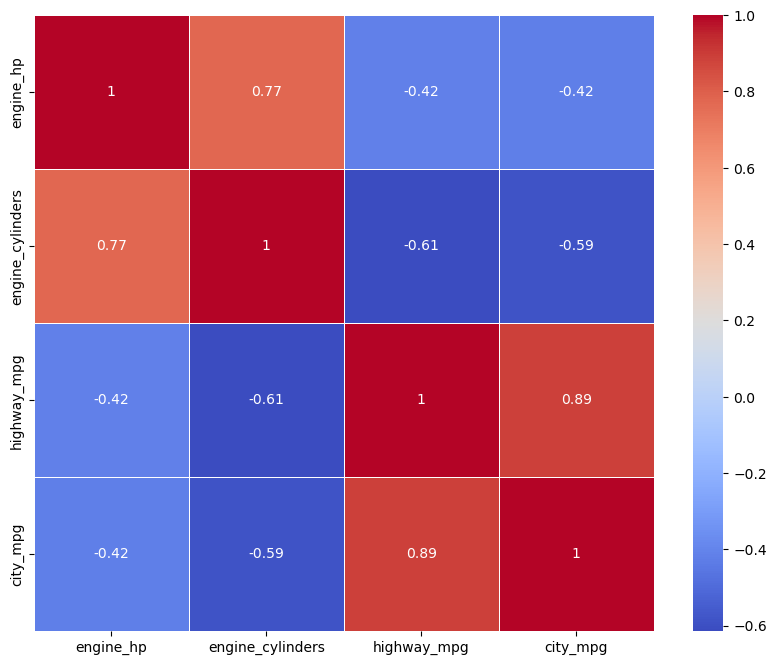

In [15]:
correlation_matrix = df[numerical].corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [16]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


## Make price binary

In [17]:
mean_price = df['price'].mean()
mean_price

40594.737032063116

In [18]:
df['above_average'] = (df['price'])>mean_price

In [19]:
df['above_average'] = df['above_average'].astype(int)

In [20]:
df= df.drop('price',axis=1)

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [22]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [25]:
df_full_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
3181,Cadillac,CT6,2016,265.0,4.0,AUTOMATIC,Sedan,31,22,1
5357,Mercedes-Benz,GLS-Class,2017,449.0,8.0,AUTOMATIC,4dr SUV,18,14,1
4874,Kia,Forte,2016,173.0,4.0,AUTOMATIC,Coupe,34,25,0
8102,Dodge,RAM 250,1993,180.0,6.0,MANUAL,Regular Cab Pickup,16,11,0
10400,Hyundai,Tiburon,2008,172.0,6.0,AUTOMATIC,2dr Hatchback,24,17,0
...,...,...,...,...,...,...,...,...,...,...
11284,Toyota,Venza,2014,181.0,4.0,AUTOMATIC,Wagon,26,20,0
5191,Pontiac,G6,2009,219.0,6.0,AUTOMATIC,Sedan,26,17,0
5390,Volkswagen,Golf GTI,2016,220.0,4.0,AUTOMATED_MANUAL,2dr Hatchback,33,25,0
860,Saab,9-5,2009,260.0,4.0,AUTOMATIC,Wagon,27,17,1


In [26]:
df_full_train = df_full_train.reset_index(drop=True)

In [27]:
df_full_train.above_average.value_counts(normalize=True)

above_average
0    0.723219
1    0.276781
Name: proportion, dtype: float64

### Mutual Information

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
mutual_info_score(df_full_train.above_average, df_full_train.make)

0.2387236479073192

In [30]:
mutual_info_score(df_full_train.above_average, df_full_train.model)

0.46099440756035703

In [31]:
mutual_info_score(df_full_train.above_average, df_full_train.transmission_type)

0.020883575914971142

In [32]:
mutual_info_score(df_full_train.above_average, df_full_train.vehicle_style)

0.08339022741593435

### Question 3


In [33]:
print(mutual_info_score(df_full_train.above_average, df_full_train.transmission_type))

0.020883575914971142


In [34]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


### One-hot encoding

### Question 4

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [37]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [40]:
y_pred = model.predict_proba(X_val)[:, 1]

In [41]:
churn_decision = (y_pred >= 0.5)

In [42]:
round((y_val == churn_decision).mean(),2)

0.95

### Question 5

In [67]:
full = ['model', 'make', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']

no_year = ['model', 'make', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']

engine_hp = ['model', 'year', 'make', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']

transmission_type = ['model', 'year', 'engine_hp', 'engine_cylinders',
       'make', 'vehicle_style', 'highway_mpg', 'city_mpg']

city_mpg = ['model', 'make' ,'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg']

dv = DictVectorizer(sparse=False)

accuracy_results = []

feature_names = ['full', 'no_year', 'engine_hp', 'transmission_type', 'city_mpg']

features = [full,no_year,engine_hp,transmission_type,city_mpg]

for feature_set in features:
       train_dict = df_train[feature_set].to_dict(orient='records')
       X_train = dv.fit_transform(train_dict)

       val_dict = df_val[feature_set].to_dict(orient='records')
       X_val = dv.transform(val_dict)

       model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
       model.fit(X_train, y_train)

       y_pred = model.predict_proba(X_val)[:, 1]

       churn_decision = (y_pred >= 0.5)

       accuracy = (y_val == churn_decision).mean()

       accuracy_results.append(accuracy)

differences = [abs(accuracy_results[0] - acc) for acc in accuracy_results[1:]]

min_diff = min(differences)
min_diff_index = differences.index(min_diff)
min_diff_feature = feature_names[min_diff_index]

print(f"{min_diff_feature} - min diff: {min_diff}")
 

transmission_type - min diff: 0.00041963911036513313
